# Data Mining 1 – Assignment 1
##### Student ID: 20115725
##### Name: Berkay Eren
##### Lecturer: Dr Bernard Butler
##### Submission Date: 26 October 2025

## 🎯 Objective - Pass 1: Data Cleaning
This notebook represents **Pass 1** of the three-pass Exploratory Data Analysis (EDA) process.  
The goal is to:
1. Understand the **structure** of the dataset.  
2. Identify and handle **missing or inconsistent values**.  
3. Determine which features are **usable**.  
4. Prepare a **clean, consistent** dataset for Pass 2

## Pass 1: Loading Data & Initial Cleaning 
### Importing Libraries
- **pandas / numpy** – data handling and calculations  
- **matplotlib / seaborn** – visualisations  
- **missingno** – quick view of missing data patterns  
- **sns.set()** – consistent plot styling

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

sns.set(style="whitegrid")

### Load Dataset and Replace Marked Values
Data are stored in a tab-separated format; `sep="\t"` is used.  
We also replace placeholder markers (`'XXXXXX'`, empty strings, etc.) with `NaN` so that they are recognised as missing values.


In [97]:
df = pd.read_csv("data/arrests.csv", sep="\t")

# Replace marked placeholders with NaN
df = df.replace(['XXXXXX', 'xxxxx', '', ' '], np.nan)
df.head()

,tgt,a1,a2,a3,a4,b,c1,c2,c3,d1,...,d3,d4,d5,e1,e2,f1,f2,g,h,i
0,n,6.02,s,NaN,n,f,d,c,w,4.80,...,NaN,s,w,NaN,NaN,f,f,NaN,l,a
1,y,5.88,x,s,r,t,s,d,r,6.11,...,r,y,w,NaN,NaN,f,f,NaN,d,u
2,n,10.05,x,t,n,t,p,NaN,n,8.66,...,NaN,NaN,n,NaN,w,t,p,NaN,d,a
3,y,7.28,f,t,y,f,x,c,y,4.55,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
4,y,2.01,p,t,n,f,a,c,n,6.69,...,NaN,t,y,NaN,NaN,t,e,NaN,m,a


### About the Dataset
Each row represents one individual released from prison.  
The **target variable** `tgt` indicates whether the person **reoffended** (`y`) or **did not reoffend** (`n`).  

Feature names such as `a1–a4`, `c1–c3`, and `d1–d5` are anonymised but grouped to represent related aspects such as demographics, behaviour, or background characteristics.


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60458 entries, 0 to 60457
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tgt     60458 non-null  object 
 1   a1      60458 non-null  float64
 2   a2      60458 non-null  object 
 3   a3      46485 non-null  object 
 4   a4      60458 non-null  object 
 5   b       60458 non-null  object 
 6   c1      50676 non-null  object 
 7   c2      35649 non-null  object 
 8   c3      60458 non-null  object 
 9   d1      60458 non-null  float64
 10  d2      60458 non-null  float64
 11  d3      9433 non-null   object 
 12  d4      22713 non-null  object 
 13  d5      60458 non-null  object 
 14  e1      3142 non-null   object 
 15  e2      7335 non-null   object 
 16  f1      60458 non-null  object 
 17  f2      58007 non-null  object 
 18  g       6292 non-null   object 
 19  h       60458 non-null  object 
 20  i       60458 non-null  object 
dtypes: float64(3), object(18)
memory us

### Dataset Structure
The dataset contains 60 458 records and 21 columns.  
Three features (`a1`, `d1`, `d2`) are numeric; the remainder are categorical.  
Several columns include missing values that require further investigation.



### Checking and Converting Data Types
Before cleaning, we’ll confirm there are no blank strings and convert categorical columns to the `category` type.  
This helps with performance and avoids mixing text with numbers.


In [99]:
(df == "").sum().sum() 

df['tgt'] = df['tgt'].astype('category')
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60458 entries, 0 to 60457
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   tgt     60458 non-null  category
 1   a1      60458 non-null  float64 
 2   a2      60458 non-null  category
 3   a3      46485 non-null  category
 4   a4      60458 non-null  category
 5   b       60458 non-null  category
 6   c1      50676 non-null  category
 7   c2      35649 non-null  category
 8   c3      60458 non-null  category
 9   d1      60458 non-null  float64 
 10  d2      60458 non-null  float64 
 11  d3      9433 non-null   category
 12  d4      22713 non-null  category
 13  d5      60458 non-null  category
 14  e1      3142 non-null   category
 15  e2      7335 non-null   category
 16  f1      60458 non-null  category
 17  f2      58007 non-null  category
 18  g       6292 non-null   category
 19  h       60458 non-null  category
 20  i       60458 non-null  category
dtypes: category(

### Checking for Missing Data
We’ll count missing values for each column and visualise where they occur to spot any patterns.

In [100]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_pct.round(2)
})

missing_summary

,Missing Values,Percentage (%)
e1,57316,94.80
g,54166,89.59
e2,53123,87.87
d3,51025,84.40
d4,37745,62.43
c2,24809,41.04
a3,13973,23.11
c1,9782,16.18
f2,2451,4.05
a4,0,0.00


<Figure size 1200x600 with 0 Axes>

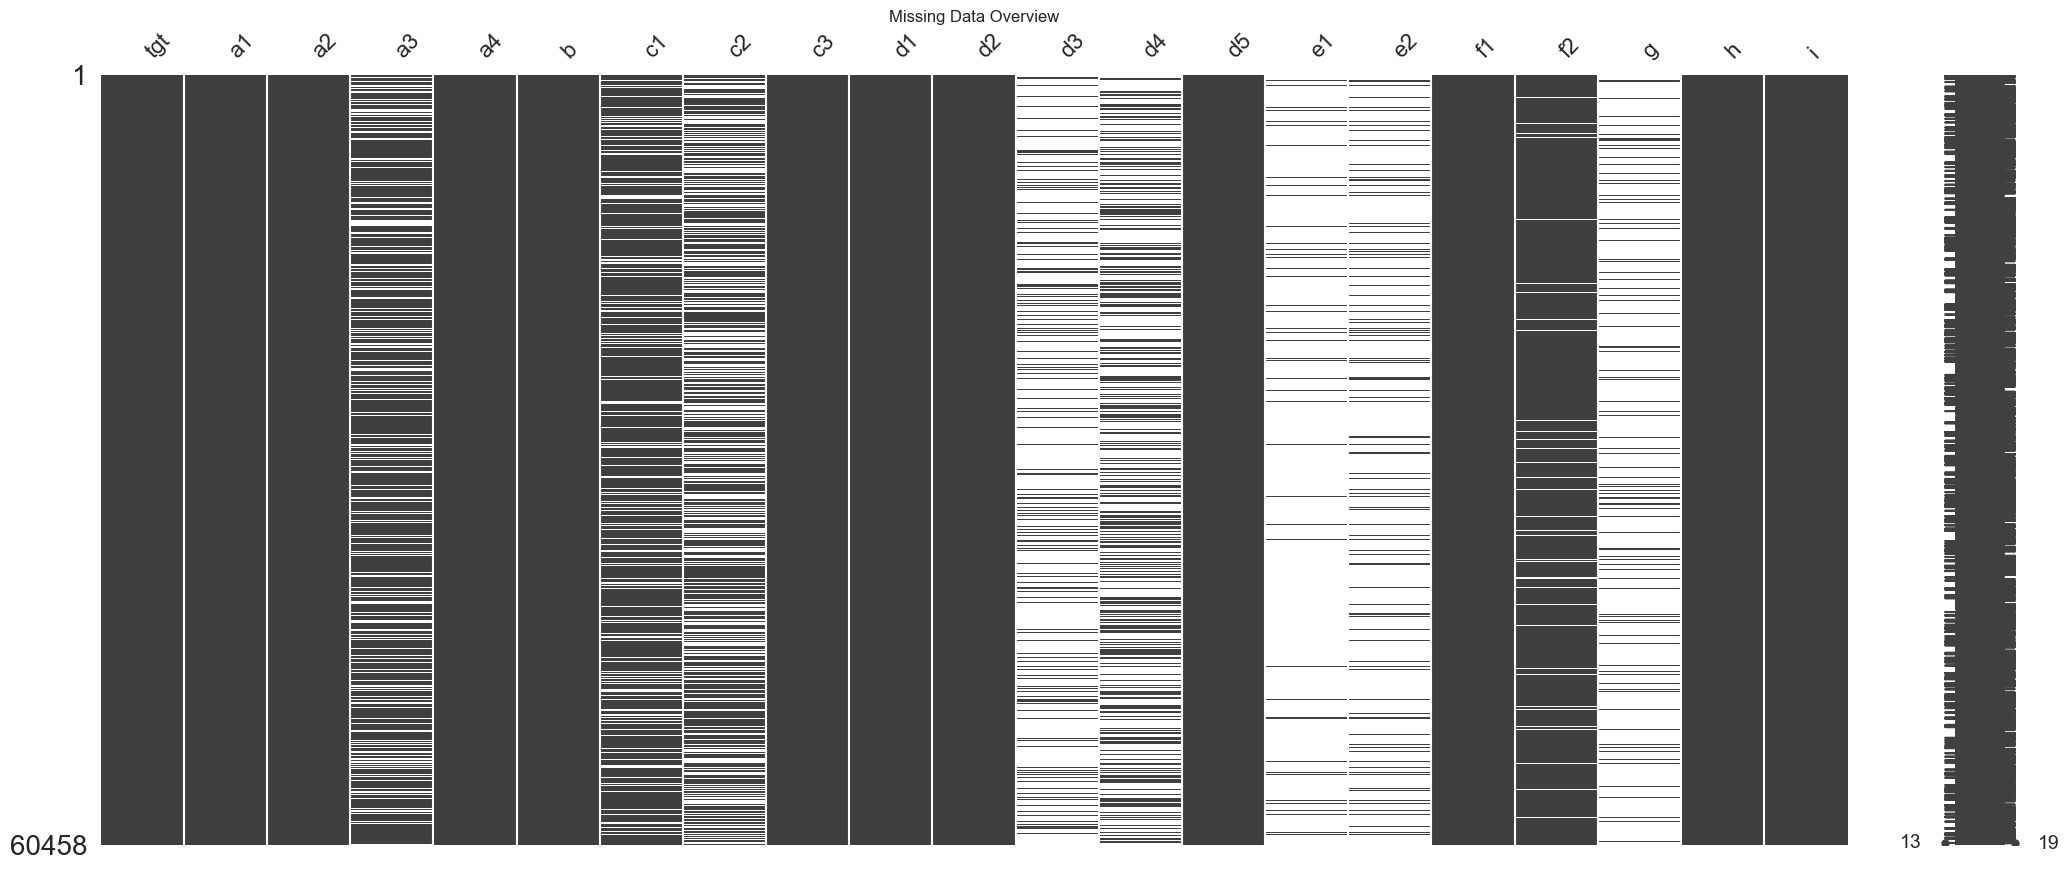

In [101]:
plt.figure(figsize=(12,6))
msno.matrix(df)
plt.title("Missing Data Overview")
plt.show()

Features `e1`, `e2`, `d3` and `g` contain over 80 % missing values.
Features `a3`, `c1`, and `c2` show moderate missingness (15–40 %) may be usable with imputation.  
Numeric variables and `tgt` are complete and fully usable.  
The right-side bar (13–19) shows most records have between 13 and 19 valid entries.

###  Handling Features or Rows with Too Many Missing Values
According to the standard procedure, if a feature or a record contains *too many* missing values,  
we should either remove it or add a boolean flag that indicates whether data are present.  

For transparency and later analysis, no features are dropped at this stage.  
Instead, a set of **boolean-valued columns** (`has_*`) is created to mark whether data exist in each high-missing feature.

In [102]:
# features with high missingness (>80%) to flag
high_missing_cols = ['d3', 'e1', 'e2', 'g']

for col in high_missing_cols:
    if col in df.columns:
        df[f'has_{col}'] = df[col].notna()

# quick check
df[[f'has_{col}' for col in high_missing_cols if f'has_{col}' in df.columns]].head()


,has_d3,has_e1,has_e2,has_g
0,False,False,False,False
1,True,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False


Each new column (e.g. `has_d3`, `has_e1`, etc.) contains:
- `True` → the feature value is **present** for that record  
- `False` → the feature value is **missing**

This approach preserves potentially useful information about the *pattern* of missingness  
while keeping all original columns intact for later analysis in Pass 2.

### Correlation of Missing Values
A heatmap is used to identify whether missing values occur together across columns.  
Strongly correlated missingness may indicate a shared data source or collection issue.


<Figure size 1000x600 with 0 Axes>

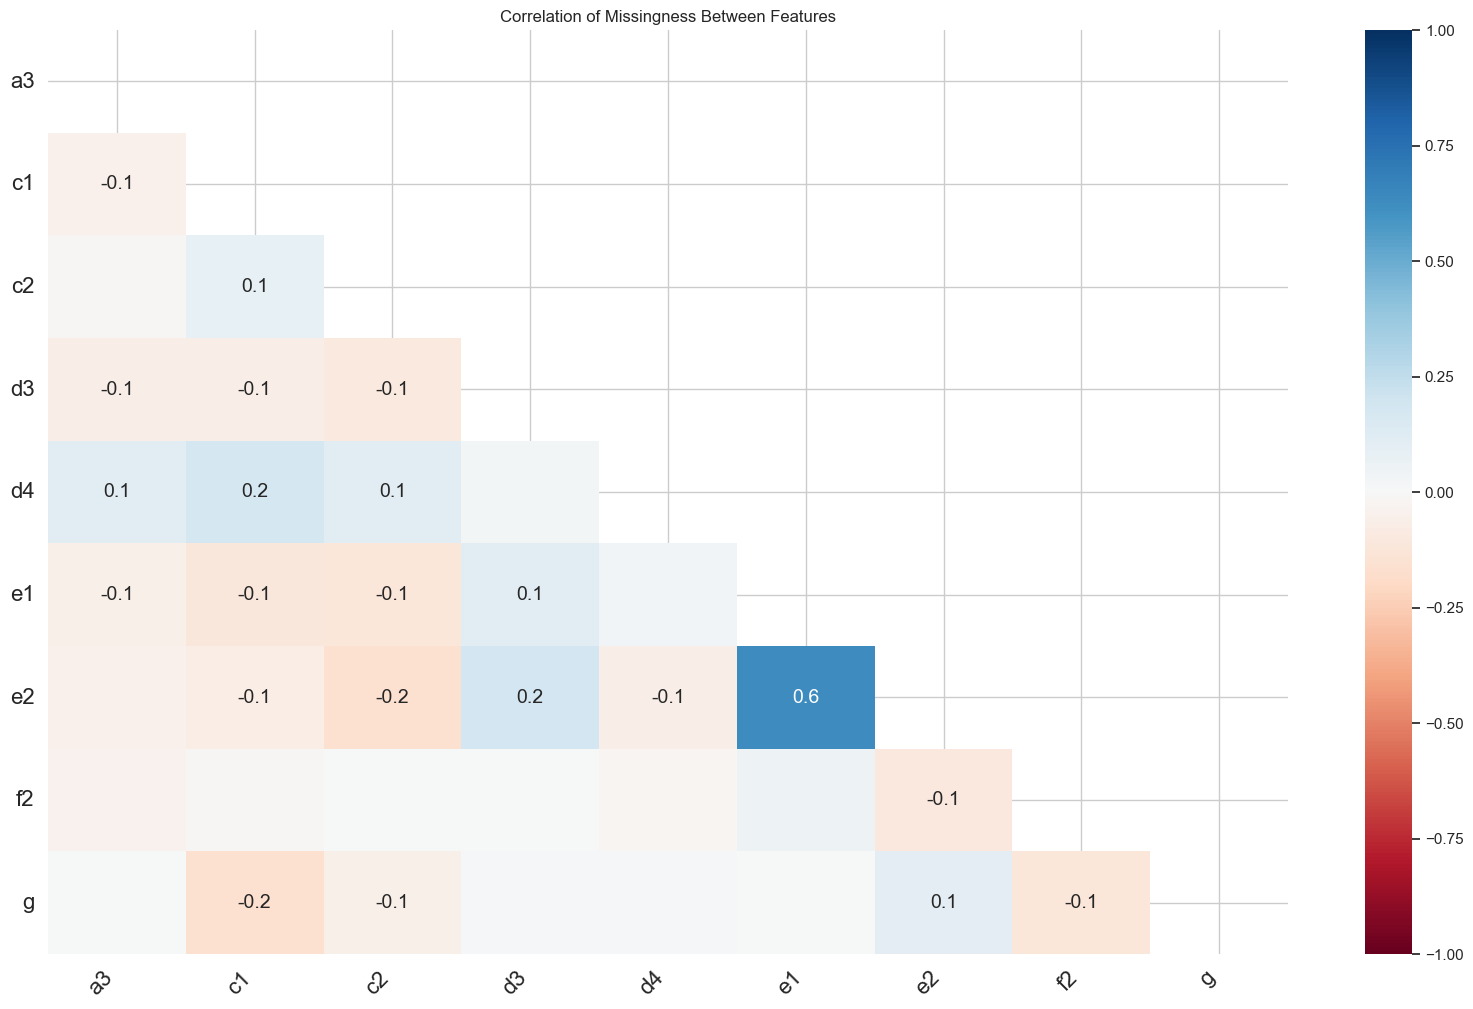

In [103]:
plt.figure(figsize=(10,6))
msno.heatmap(df)
plt.title("Correlation of Missingness Between Features")
plt.show()

### Interpretation of Heatmap
The heatmap displays correlations in missingness between features.  
A value of **0.6 between `e1` and `e2`** indicates that these two columns tend to be missing together roughly 60% of the time.  
This suggests that `e1` and `e2` either depend on similar conditions or originate from the same incomplete questionnaire section.

### Checking Missing Values per Row
Before deciding on a threshold for dropping incomplete rows,  
how many missing values each record (row) contains have to be examined.  
This helps identify whether most rows are nearly complete or many are largely empty.

count    60458.000000
mean         5.034735
std          1.122167
min          2.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: missing_count, dtype: float64


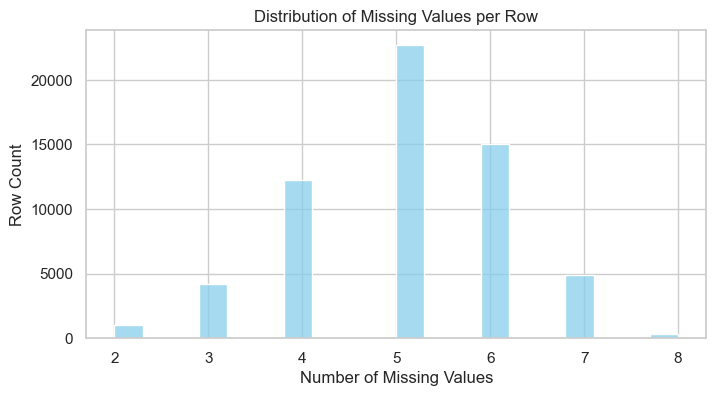

In [104]:
# Count number of missing values per row
df['missing_count'] = df.isna().sum(axis=1)

# Quick summary
print(df['missing_count'].describe())

# Plot the distribution
plt.figure(figsize=(8,4))
sns.histplot(df['missing_count'], bins=20, kde=False, color='skyblue')
plt.title("Distribution of Missing Values per Row")
plt.xlabel("Number of Missing Values")
plt.ylabel("Row Count")
plt.show()

### Row Completeness Check
The number of missing values per row ranges from 2 to 8 (out of 21 total features).  
Even the most incomplete records are missing less than 40 % of their values,  
so no rows are considered excessively sparse.  

Therefore, **no rows are dropped** in Pass 1.  
All records are retained for further exploration in Pass 2.

## PASS 1 – Summary  

**Aim:**  
Prepare a clean, well-structured dataset for subsequent feature exploration and interpretation.

**Results**
- **Shape:** 60 458 rows × 21 original columns  
- **Numeric features:** `a1`, `d1`, `d2`  
- **Categorical features:** 18 converted to `category` dtype  
- **Missing-data diagnosis:**  
  - Highest missingness → `d3`, `e1`, `e2`, `g` (≈ 80 %+)  
  - Moderate missingness → `a3`, `c1`, `c2` (15–40 %)  
- **Boolean flags added** (`has_*`) for high-missing columns to preserve missingness patterns (Step 3).  
- **No features or rows dropped** in Pass 1 – only flagged.  
- **Target variable (`tgt`)** verified as categorical and complete.  
- **No placeholder strings** remain after replacing empty values with `NaN`.  
- **Row-level completeness:** each record missing 2–8 values (mean ≈ 5); none > 40 % missing.  
- **Missingness visualised:** between `e1` and `e2` (~0.6) suggesting that missingness in one often coincides with missingness in the other.  

**Reflection**  
Pass 1 established a reliable foundation for analysis.  
Data types were corrected, placeholders standardised, and missingness quantified and flagged instead of removed.  
All features were retained to allow evaluation of their usefulness and predictive relevance in **Pass 2**, where distributions and relationships with the target (`tgt`) will be explored in detail.


In [105]:
# save the cleaned, usable dataset for later passes
df.to_csv("data/cleaned_arrests.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
